# 3 Step Process to Analyzing Your Data (General case)
1. Define your goal, why this matters, your target variable, initial hypotheses (write these down)
2. Get to know your data: obtain a 10,000 ft view of your data before diving in (write down what you learn/discover)
3. Answer your initial hypotheses questions with visuals and statistics (write down takeaways as you go)

## Step 1: Define your goal. What's the impact? Who benefits? Why does this matter? 
- Take *lots* of written or typed notes here. 
- What, exactly, are you seeking to understand?
- Define your target variable. Does one exist in your dataset?
- Define your initial hypotheses: literally write them down
    - Are the stakeholders hoping to confirm or deny something already? That's a good start.
    - What initial hunches do you have? How could you confirm or deny them?
    - Are there industry based hunches you can confirm or deny?
    - If you have data from your industry, how does your dataset compare?
    - Based on the columns you have, do you see anything you *know* you need to look at?
- Define your Minimum Viable Product (MVP)
    - How do you know when you're done?
    - How do you know when you've got something to deliver?
    - If something seems interesting but out of scope, add it to your backlog and get back to the heart of the matter

### How to Generate Initial Hypotheses  

Think and write down your thoughts

![](hypothesis_generation.png)

### Defining Your Minimum Viable Product (MVP)

The real MVP is producing insight and takeaways stakeholders can use to improve their decision making

What would a Minimum Viable Product look like? You likely won't have 6 months to produce answers.

![](mvp.png)

## Step 2: Get to know your data at a high level
- *Dump out all your legos and take inventory of what you have*
- Take lots of written or typed notes as you move through these steps)
- Hunt down a data dictionary that explains what each column of your data is or represents.
    - This may mean talking to people
    - This may mean having coffee w/ someone from accounting to pick their brain
- What does each row represent, specifically? A customer? A household?
- Determine if there's any columns needing cleaning or a change in data type
- Hunt for any nulls or missing data. Write down how you handle them. There's no one right answer.
- What's the distribution of your target variable? What about your most interesting variables?

![](storytelling.webp)

## Step 3: Answer your initial hypotheses with visuals and statistics
- Always write down your takeaways as you learn or reveal them
- Use visuals, descriptive stats, and inferential stats to answer your hypotheses
- Start with one hypothesis at a time.
- Visualize and get stats on the population
- Start making subgroups to compare subgroups to the population and subgroups to subgroups
- Focus on getting the biggest bang for your buck rather than counting toenails on an ant.

![](descriptive-and-inferential-statistics.jpeg)

### Explore Relationships Between Variables and the Target Variable
![](hypothesis.jpeg)

# 3 Step Process to Data Analysis (Specific case with HR Attrition Data)
1. Define your goal, why this matters, your target variable, initial hypotheses (write these down)
2. Get to know your data: obtain a 10,000 ft view of your data before diving in (write down what you learn/discover)
3. Answer your initial hypotheses questions with visuals and statistics (write down takeaways as you go)

## Step 1 is to define our goal, why it matters, identify target variable, state initial hypotheses
- Manager shows up and says "HR gave us this data and wants to know why people are leaving?"
- Our goal: What are the drivers of attrition? 
- Why does attrition matter? 
    - A quick search showed that replacing an employee can cost between 50%-200% of their salar
    - Losing skilled employees to the competition
    - Costs more to train/replace than keep an employee
    - Productivity
    - Current team picking up the slack for lost employees
    - Snowball effect of attrition
    - Maybe the VP of HR gets a bonus if they bring down attrition (coffee + all source intel)
- What's our target variable? Attrition itself
- What are some interesting variables that you think might drive attrition (initial hypotheses)
    - Year since last promotion: what's the relationship between years since last promotion and attrition
    - Overtime: what's the relationship between overtime and attrition?
    - JobSatisfaction, relationship satisfaction
    - Years in role
    - Monthly Income
    - Marital status or other demographic info

- What would a minimally viable product look like? MVP == First Draft, Second draft makes it look like you knew what you were doing all along
    - What target rate are we hitting with churn? What's the 
    - Get an answer to the biggest story or two?
    - Defining a deliverable: 
        - could be as simple as an email with a few recommendations
        - could be a slide show
        - could be ML model that we deliver to the engineering team to deploy live
    - We have survey data about job satisfaction and work/life balance - should we believe those surveys?
    
- Source your data [https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

## Step 2: get to know the data at a high level
- Histograms and .value_counts of our target variable and variables of interest
- Determine if we have any missing values
- General guideline: 
    - if you're looking at how x and y move together, we need to oeprate on the `train` dataset
    - if you're doing any ML, split the data before exploring (exploring = looking at multiple variables together)
- Check your datasource for a data dictionary: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
- Check the value counts or a histogram of your target variable
- Determine if there's any work to do on data types or processing/cleaning the data before handling datatypes
- Check for nulls and handle them

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("attrition.csv")

In [2]:
# Print out the first few records
# I chose to do a transpose since there were too many columns to show at once
df.head(2).T

,0,1
Age,41,49
Attrition,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently
DailyRate,1102,279
Department,Sales,Research & Development
DistanceFromHome,1,8
Education,2,1
EducationField,Life Sciences,Life Sciences
EmployeeCount,1,1
EmployeeNumber,1,2


<AxesSubplot:>

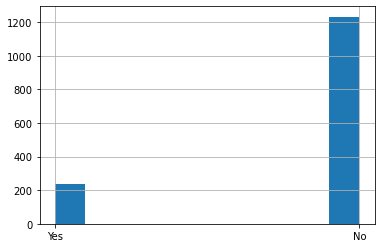

In [3]:
# Our target variable is attrition, so let's get a value_count or historam of our target variable
df.Attrition.hist()

In [4]:
# Let's show the numbers
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
# What's the proportion of attrition?
# Ok, what's the industry attrition
# https://www.applauz.me/resources/how-to-calculate-employee-turnover#:~:text=According%20to%20recruiting%20giant%20Monster,turnover%20rate%20across%20the%20board.
# If "healthy" attrition is 10%
# Takeaway: This company has 60% more attrition than what's considered healthy/good
df[df.Attrition == "Yes"].shape[0] / df.shape[0]

0.16122448979591836

In [6]:
# We can run df.info() to check for nulls and datatypes
# Nice to know: our data types check out and we don't have any nulls to worry about
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# How many people left?
(df.Attrition == "Yes").sum()

237

In [8]:
# Business saves this money if people leave
(df[df.Attrition == "Yes"].MonthlyIncome.sum() * 12)

13614492

In [9]:
# Quantify the cost of our lost employees
# https://www.peoplekeep.com/blog/employee-retention-the-real-cost-of-losing-an-employee#:~:text=The%20cost%20of%20employee%20turnover%20is%20high&text=Some%20studies%20predict%20that%20every,wage%20and%20role%20of%20employee.
# Let's assume 60% of salary to replace employees
(df[df.Attrition == "Yes"].MonthlyIncome.sum() * 12) * .6

8168695.199999999

## Takeaways So Far:
- Attrition is 60% above a healthy level of 10%
- It may cost at least $8m to replace 237 employees who left

## Step 3: Answer your initial hypotheses questions with visuals and statistics (write down takeaways as you go)
- If we were doing any ML, we would split our data and only explore `train` instead of the entire dataset at this stage.
- Exploring the dataset means understanding and interogating the relationships between variables and the target
- Use descriptive stats, visuals, hypothesis tests
- Visualize average monthly income to attrition
- Visualize job satisfaction numbers to attrition
- Sometimes a few stats tell the story, othertimes we need a handful of charts

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

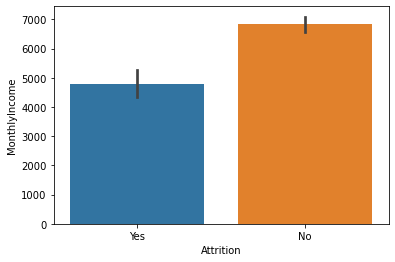

In [10]:
# Barplots show average and we can specify categories
sns.barplot(x="Attrition", y="MonthlyIncome", data=df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

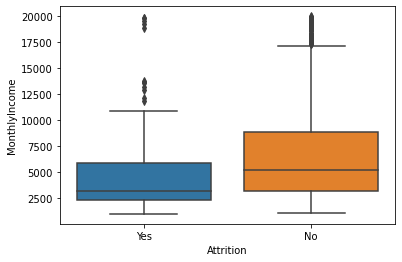

In [11]:
# Boxplots show the median in the middle of the box
# Lower bound of the box is Q1, upper bound of the box is the 3rd quartile
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)

## Listing Takeaways so far:
- Average and median and most incomes for folks who left are lower than folks who stayed
- Of folks who left, we have a larger proportion of single folks.
- Of the folks who stayed, we have a larger proportion of married employees


In [12]:
# Does marital status have anything to do with attrition?
lost = df[df.Attrition == "Yes"]
kept = df[df.Attrition == "No"]

<AxesSubplot:>

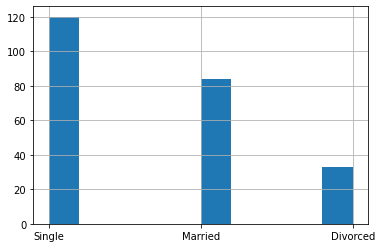

In [13]:
lost.MaritalStatus.hist()

<AxesSubplot:>

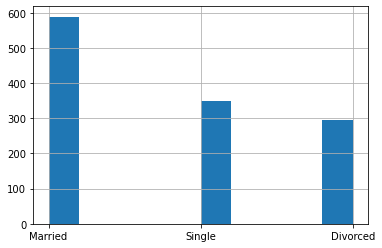

In [14]:
kept.MaritalStatus.hist()

In [15]:
# What's the relationship between gender and attrition
kept.Gender.value_counts()

Male      732
Female    501
Name: Gender, dtype: int64

In [16]:
# Proportion of women employees staying
501 / (kept.shape[0])

0.40632603406326034

In [17]:
lost.Gender.value_counts()

Male      150
Female     87
Name: Gender, dtype: int64

In [18]:
# Proportion of women employees leaving
87 / lost.shape[0]

0.3670886075949367

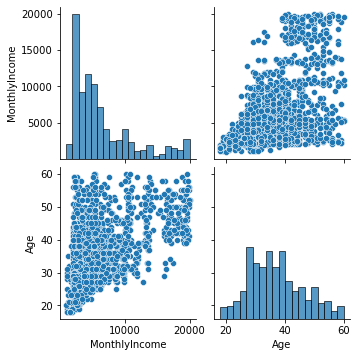

In [19]:
# Think of pairplot as casting a VERY wide net for our numeric columns
# If specific plots seem valuable/interesting, we'll make a .relplot for those variables
# If we have columns that are rankings like 1, 2, 3, or 4 - we might do better to treat those at categories
# Use pairplot sparingly if you have many columns (or reduce your columns to make more clear visual)
# Discrete number or ordinal numbers often don't visually tell the story

sns.pairplot(data=df[["MonthlyIncome", "Age"]])

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

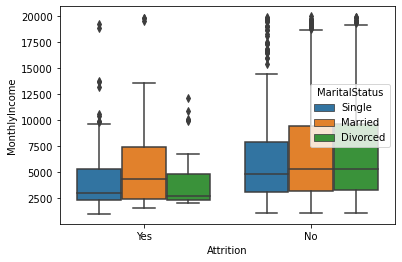

In [20]:
# We could use Hue argument to add another dimension
sns.boxplot(x="Attrition", y="MonthlyIncome", hue="MaritalStatus", data=df)

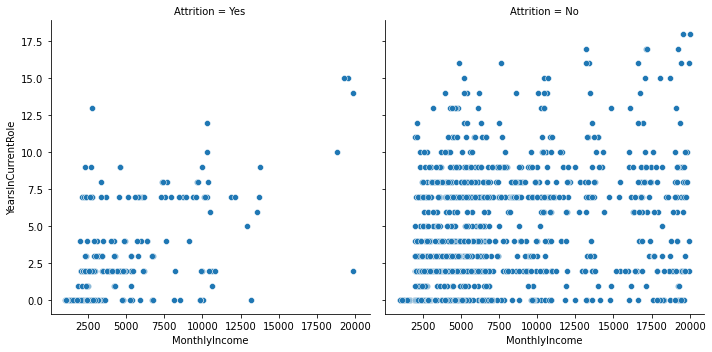

In [21]:
# Can we add 3rd variables?
sns.relplot(x="MonthlyIncome", y="YearsInCurrentRole", col="Attrition", data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

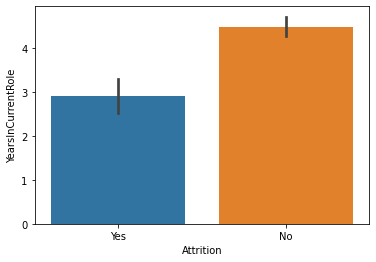

In [22]:
# Barplot shows averages
sns.barplot(x="Attrition", y="YearsInCurrentRole", data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

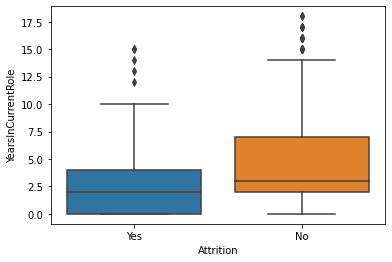

In [23]:
# Boxplot shows distribution/spread
sns.boxplot(x="Attrition", y="YearsInCurrentRole", data=df)

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

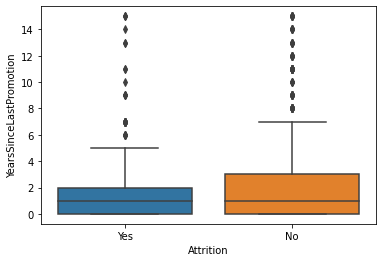

In [24]:
sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=df)

## New Takeaways
- Folks who stayed have been at the role longer than folks who left *this isn't a great takeaway. seems like one causes the other*
- If this is all the time we have, let's focus on the most impactful pieces we found earlier